# Implementing What We Learned So Far
By: Adrian Garcia <br>
UCSC: AM170B

## Week 1 Recap:
- Extra office hour this week -- Friday: 1 pm - 3 pm
- Topics:
    - Python (data types, for loops, functions, plotting, etc.)
    - Packages (Pandas, Seaborn)
    - Homework 1 walkthrough

## Week 2 Recap:
### Singular Value Decomposition (SVD)
<br>
Let $\mathbf{A}$ be a real $n \times m$ matrix such that ${\rm{rank}}(\mathbf{A}) = k \leq {\rm{min}}(n,m)$. Then, there exists two ortogonal matrices $\mathbf{U}$ (of size $n \times k$) and $\mathbf{V}$ (of size $m \times k$) such that
$$\mathbf{A} = \mathbf{U}\mathbf{\Sigma}\mathbf{V}^{\top}$$
where $\mathbf{\Sigma}$ is a $k \times k$ diagonal matrix whose $k$ non-zero diagonal entries are $\sigma_{1} \geq \sigma_{2} \geq \dots \geq \sigma_{k}$.

#### Data Reduction Using SVD
<br>
Let $\hat{\mathbf{A}}$ be a reduction of $\mathbf{A}$. In using the SVD of $\mathbf{A}$, we may then construct $\hat{\mathbf{A}}$ using ortogonal matrices $\mathbf{U}$ (of size $n \times \color{red} r$) and $\mathbf{V}$ (of size $m \times \color{red} r$) such that
$$\hat{\mathbf{A}} = \mathbf{U}\mathbf{\Sigma}\mathbf{V}^{\top}$$
where $\mathbf{\Sigma}$ is a $\color{red} r \times \color{red} r$ diagonal matrix. Note that $\color{red} r \leq k$ is chosen at the disscresion of the user.

In [1]:
### How to choose the optimal r ###
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Load data
df = pd.read_csv('ovarian_cancer.csv')
# Drop non-numeric columns
df.drop(columns = ['status', 'patients'], inplace = True)
# Convert to data to matrix to perform SVD
X = np.mat(df)
# Perform SVD
U, S, V_T = np.linalg.svd(X, full_matrices = False)

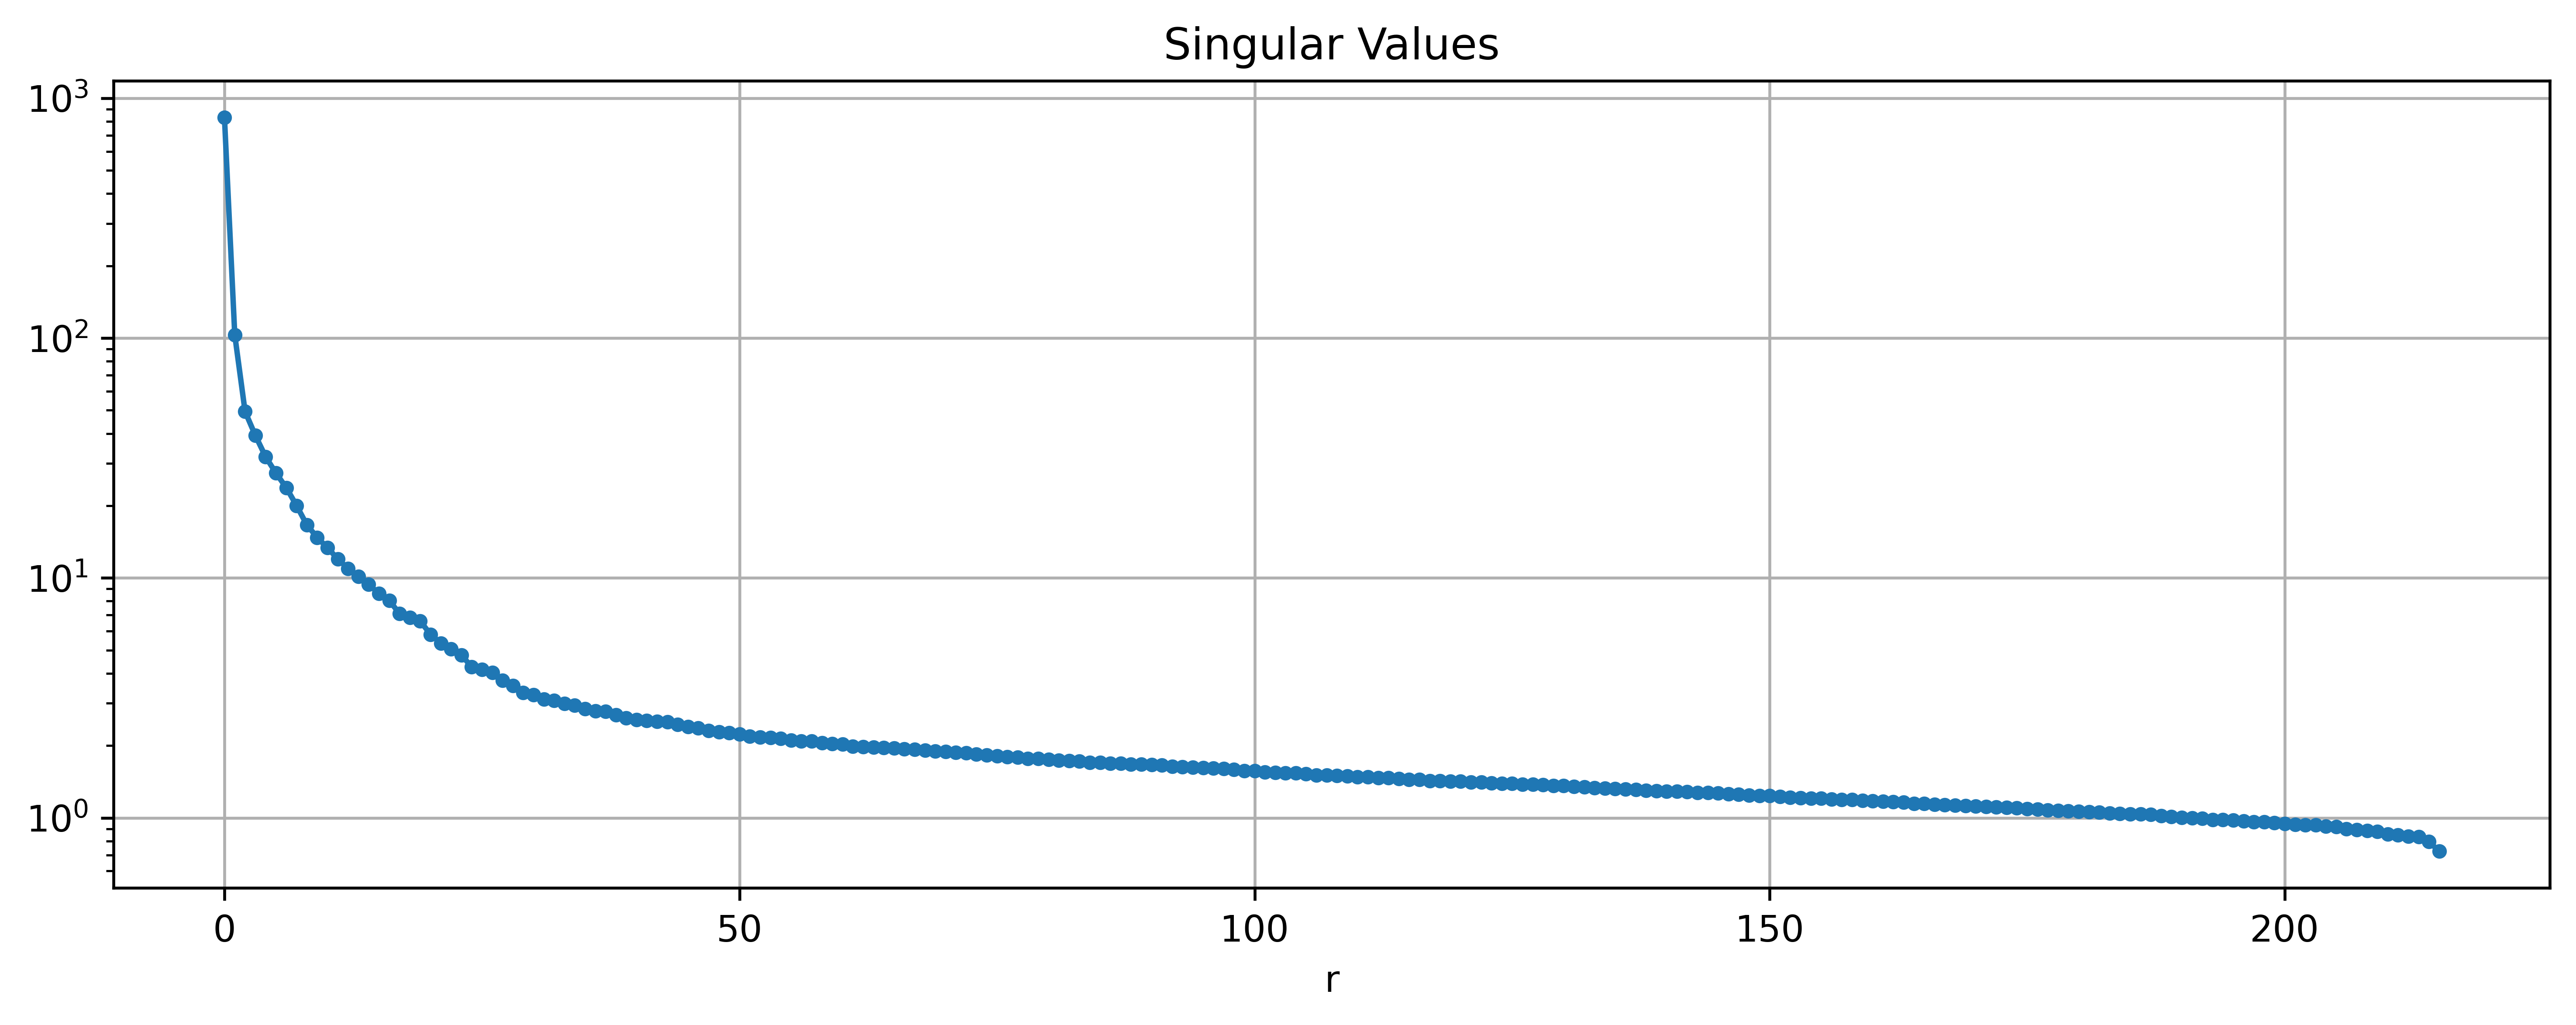

In [2]:
# The larger the singular value, the more info it brings to the table
plt.figure(figsize = (12, 4), dpi = 600)
plt.semilogy(S, '.-')
plt.title('Singular Values')
plt.xlabel('r')
plt.grid()
plt.show()

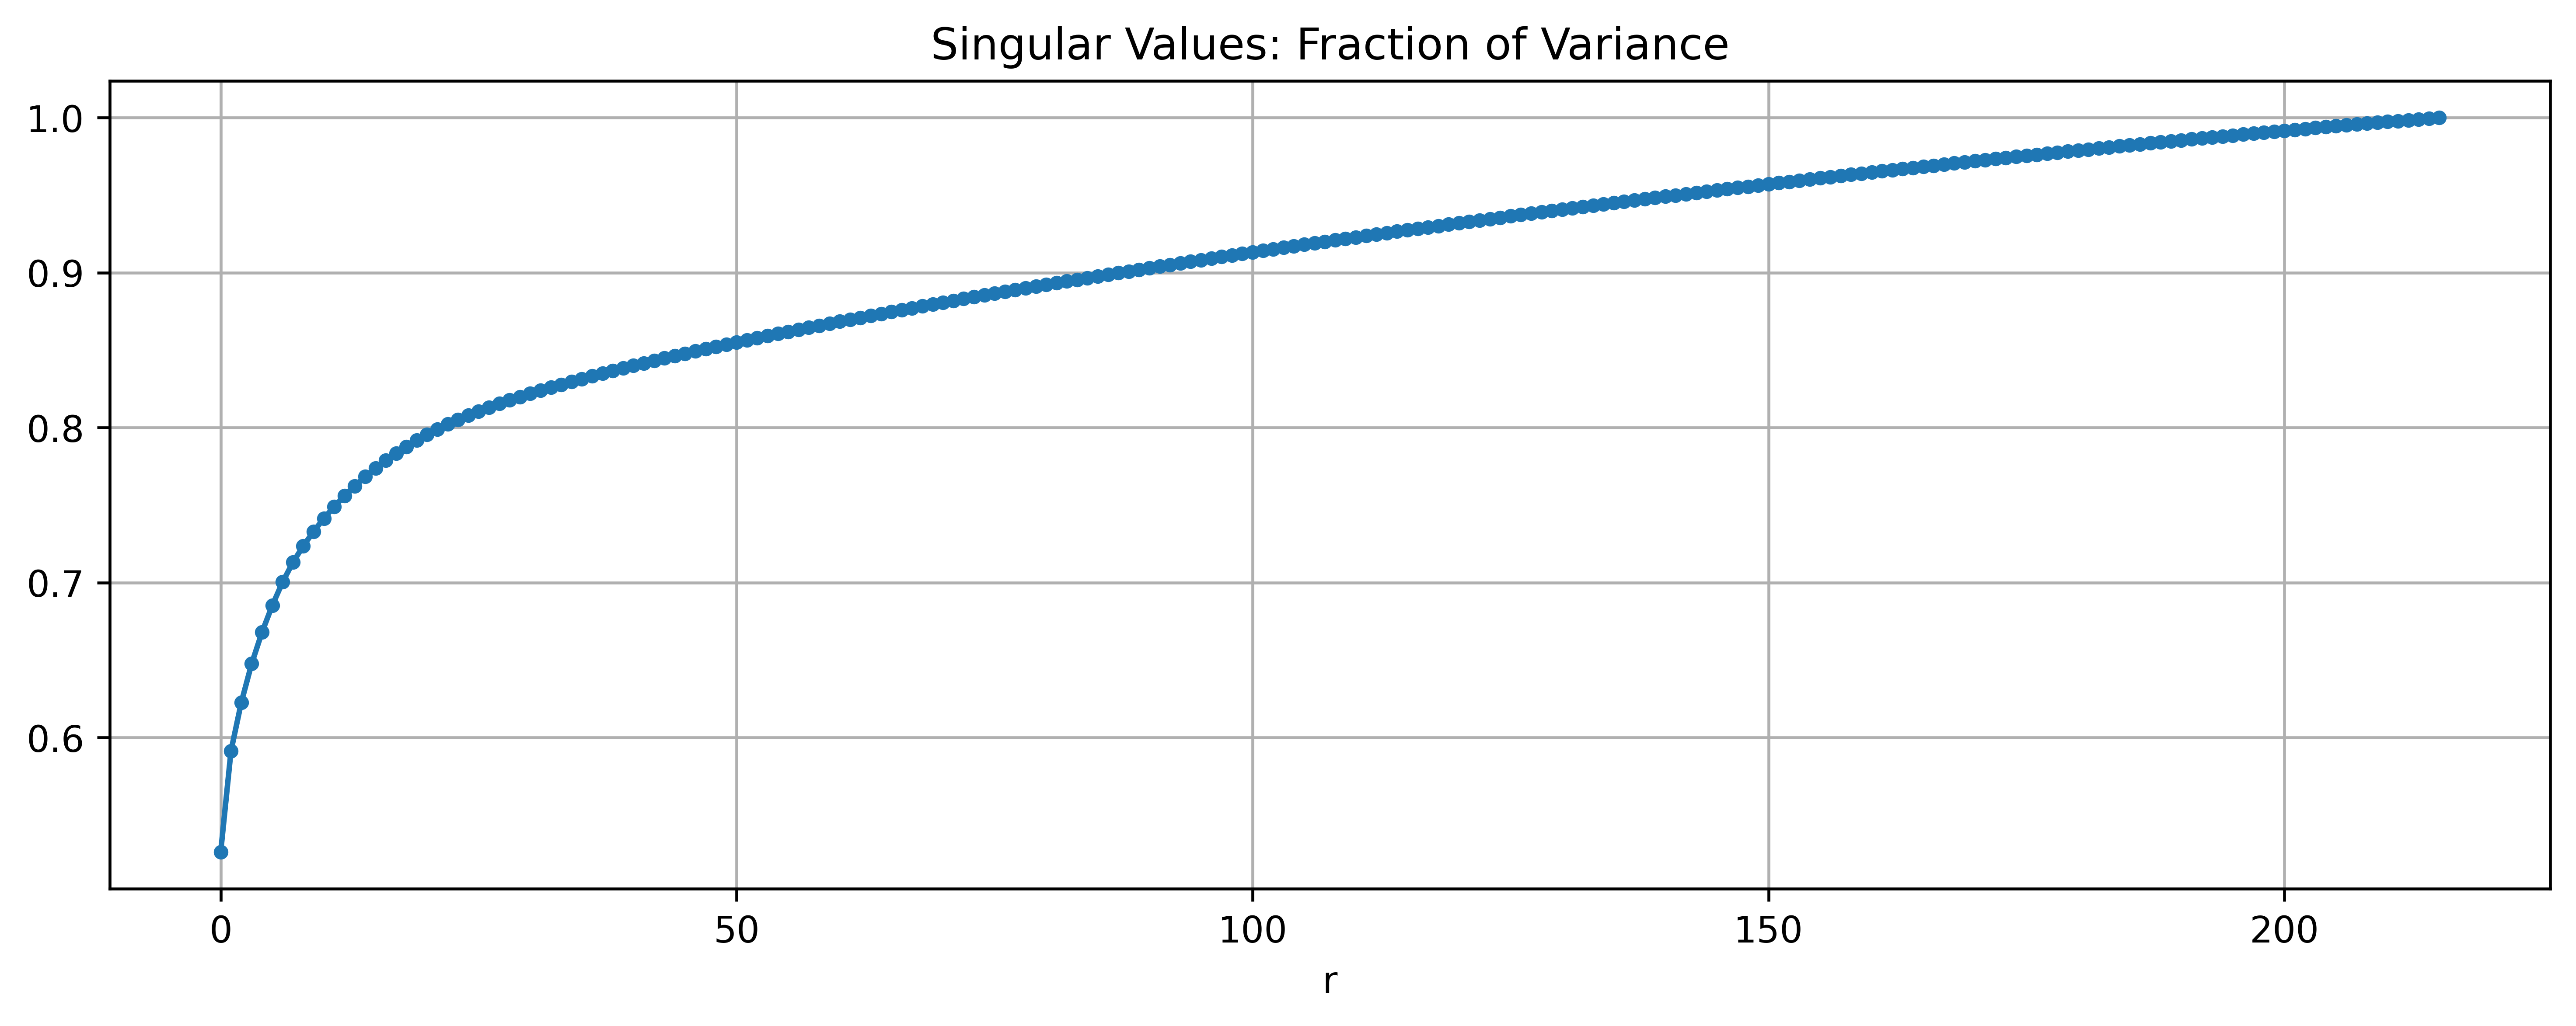

In [3]:
# Fraction of characteristics captured at some r value
plt.figure(figsize = (12, 4), dpi = 600)
plt.plot(np.cumsum(S)/np.sum(S), '.-')
plt.title('Singular Values: Fraction of Variance')
plt.xlabel('r')
plt.grid()
plt.show()

### Principle Component Analysis (PCA)
#### Assumption: each row of the data represents an experiment/sample.
(1) Compute the mean of each row:
$$\bar{x}_{i} = \frac{1}{n}\sum_{j = 1}^{n} \mathbf{X}_{ij}$$
(1.1) Construct the average matrix:
$$\bar{\mathbf{X}} = \begin{bmatrix}\bar{x}_{1} \\ \bar{x}_{2} \\ \vdots \\ \bar{x}_{3}\end{bmatrix}\begin{bmatrix}1 & 1 & \dots & 1\end{bmatrix}$$

(2) Subtract mean from data:
$$\mathbf{B} = \mathbf{X} - \bar{\mathbf{X}}$$
#### Method 2
(3) Perform SVD decomposition on matrix $\mathbf{B}$:
$$\mathbf{B} = \mathbf{U}\mathbf{\Sigma}\mathbf{V}^{\top}$$
(4) Construct principle component matrix:
$$\mathbf{T} = \mathbf{B}\mathbf{V} = \mathbf{U}\mathbf{\Sigma}\mathbf{V}^{\top}\mathbf{V} = \mathbf{U}\mathbf{\Sigma}$$
$\mathbf{T}$ is then our principle component matrix whose columns represent principle components (i.e. column 1 = principle component 1, column 2 = principle component 2, etc.)

### Independent Component Analysis (ICA)
#### Assumption: each source signal is independently sourced.
- It's derivation is a bit beyond the scope of this class, but luckily, it's implementation is not :^)

#### Pseudocode
```python
# Packages
from sklearn.decomposition import FastICA
# Create FastICA object
ICA = FastICA(n_components = n)
# Implement ICA
ICA_signals = ICA.fit_transform(X) # X can be a data frame! (small caveat: all elements must be numeric)
# Each uncovered signal is then the columns of ICA_signals
```

## Project Example
### Discovering the Dynamics of Unknown Governing Equations From Noisy Data
- Key take-aways:
    - You may find yourself doing all this work only to have lackluster results, and that's okay!
    - The quality of your project is up to you, you decide what is project worthy or not.
    - It is okay to use previously published papers as a basis for your project, BUT you must cite your work!

## Homework Workshop
### I Deriving PCA from the SVD

This homework problem will highlight the relationship between singular value decomposition and principal component analysis.

1. Implement principal component analysis for an arbitrary dataset: you may use an implementation of the singular value decomposition.

**Hint:** (1) Use the steps outlined in this lecture as well as last week's lecture. (2) `mat.mean()` is a very cool numpy attribute for matrices, especially if you add `axis = 1` as an argument :^)

In [4]:
### Question 1 ###
# Import package
import numpy as np
def PCA(X):
    # (1) Compute the mean of each row:
    x_bar = X.mean(axis = 1)
    # (1.1) Construct the average matrix
    X_bar = x_bar*np.ones((1, X.shape[1]))
    # (2) Subtract mean from data
    B = X - X_bar
    # Method 2: (3) Perform SVD decomposition on matrix B 
    U, S, VT = np.linalg.svd(B, full_matrices = False)
    # Use the singular values from S to construct a diag matrix S
    S = np.diag(S)
    # (4) Construct principle component matrix
    T = np.matmul(U,S)
    # Return principle component matrix T and Sigma from SVD decomposition
    return T, S

2. Using the ovarian_cancer.csv dataset from the last homework, apply your implementation of PCA. Plot singular values and plot the fraction of variance corresponding to each singular value.

**Hint:** (1) Dropping non-numeric columns is a good step to implement, also consider transforming the data to a matrix so that we may use numpy however we want. (2) Plotting singular values have been done before in previous lectures, I just wonder which one ;)

3. Find the two first principal components. Note that the ith principal component is calculated by:
$$u_{i} = \text{argmax}_{\|u_{i}\| = 1} u_{i}^{\top}\mathbf{B}^{\top}\mathbf{B}u_{i}$$
where $\mathbf{B}$ is the covariance matrix of the our observations $\mathbf{X}$.
<br>
Plot the reduced data projection onto the first two principal components. Color data points by their status (cancer vs normal).

**Hint:** Adding back in non-numeric columns would make this process a lot easier, add Seaborn and you have a recipe for greatness!

### II Signal decomposition.

In this problem, we aim to recover unobserved signal sources from observed signal mixtures, exploiting only the assumption that there exists mutual independence between unobserved signal sources. Signal separation has applications in sound engineering, telecommunication, neuroscience and many other areas of science and engineering.
<br>
1. Download mixed_signals.csv from Canvas. The rows represent time and the columns correspond to an observed signal mixture. Plot each signal over time.

**Hint:** I wonder if Pandas has a built in plotting attribute :)

2. Recover unobserved source signals from observed mixed signals. You may use methods such as ICA, PCA, and other dimensionality reduction algorithms. Plot recovered source signals over time. Compare other results to PCA and discuss.

**Hint:** PCA compresses data, ICA isolates data; use this information to determine if PCA is the best tool here.

3. Write down the equations for each of the recovered source signals. These are known mathematical functions.

**Hint:** There's quite a few wave functions out there, I wonder if any of them are here in this data set?